In [2]:
import gensim.downloader
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
model = gensim.downloader.load("glove-wiki-gigaword-50")

In [4]:
get_embedding = lambda word: model[word]
first_word = "king"
second_word = "queen"
word_one_embedding = get_embedding(first_word)
word_two_embedding = get_embedding(second_word)
embedding = word_one_embedding - word_two_embedding

50

In [11]:
semantic_difference_db = {
    "apple-banana": {
        "id": 1,
        "word1": "apple",
        "word2": "banana",
        "embedding": embedding.tolist(),
    },
    "apple-banana": {
        "id": 1,
        "word1": "apple",
        "word2": "banana",
        "embedding": embedding.tolist(),
    }
}

if len(semantic_difference_db) > 1:
    vectors = [word["embedding"] for word in semantic_difference_db.values()]
    variances = np.var(vectors, axis=0)
    low_variance_dims = np.argsort(variances)[:3]
    result = {
        "variance": variances.tolist(),
        "top_variance_dims": low_variance_dims.tolist(),
    }

In [1]:
db = {
  "hello-world": {"id":1, "embeddings": [1, 2, 3]},
  "goodbye-world": {"id":2, "embeddings": [4, 5, 6]},
  "hello-moon": {"id":3, "embeddings": [7, 8, 9]},
}

len(db)

3

In [18]:
# add word to db 
def add_word(word):
  if word in db:
    print("word already exists")
    return
  db[word] = {"id": len(db), "embeddings": [1, 2, 3]}

In [19]:
test=["hello", "world",]
w = '-'.join(test)

In [20]:
db

{'hello-world': {'id': 1, 'embeddings': [1, 2, 3]}}

In [21]:
w in db

True

In [3]:
vectors = model.vectors

# Find the minimum and maximum values
min_val = vectors.min()
max_val = vectors.max()

print("Range of embeddings:", min_val, "to", max_val)

Range of embeddings: -5.4593 to 5.3101


In [5]:
word = "kjkashdiuagf"
model[word]

KeyError: "Key 'kjkashdiuagf' not present"

In [ ]:

model["Japan"]

In [20]:
common_category_words = [
    {"id": 1, "item": "apple", "category": "fruit"},
]

new_word = {"id": 2, "item": "banana", "category": "fruit"}

def add_common_category_words(new_word: dict) -> dict:
  try:
    for word in common_category_words:
      if new_word["item"] == word["item"]:
        return {"data": {"Word already exists"}}
      
    common_category_words.append(new_word)
    return {"data": "Success"}
  except:
    return {"data": {"Something went wrong"}}

In [24]:
common_category_words

[{'id': 1, 'item': 'apple', 'category': 'fruit'},
 {'id': 2, 'item': 'banana', 'category': 'fruit'}]

In [27]:
common_category_words = [
   
]

vectors = [word["embedding"] for word in common_category_words]

In [9]:
db = {
    1: {"id": 1, "item": "apple", "category": "fruit"},
    2: {"id": 2, "item": "banana", "category": "fruit"},
}

In [12]:
db.values()['id']

TypeError: 'dict_values' object is not subscriptable

In [3]:
japan = model["japan"]
germany = model["germany"]
france = model["france"]
spain = model["spain"]

In [8]:
vectors = ['japan', 'germany', 'france', 'spain', 'italy', 'canada']

# Extracting vectors
vectors = np.array([model[country] for country in vectors])

# Calculate the variance along each dimension
variances = np.var(vectors, axis=0)

In [9]:
variances

array([0.71291775, 0.15429573, 0.28167078, 0.5604816 , 0.12800254,
       0.13497332, 0.17403843, 0.09592731, 0.38199902, 0.1408784 ,
       0.02114136, 0.14096975, 0.33009112, 0.16774349, 0.13681199,
       0.37320152, 0.19205116, 0.35523164, 0.02965586, 0.17145623,
       0.5522394 , 0.18279208, 0.09120435, 0.21490712, 0.21804202,
       0.13848749, 0.07703515, 0.05367562, 0.05377205, 0.20962723,
       0.04383082, 0.01584739, 0.35106146, 0.09532548, 0.07464921,
       0.11549121, 0.04268583, 0.42523637, 0.09548012, 0.04159508,
       0.68399495, 0.163478  , 0.12226149, 0.03736075, 0.333157  ,
       0.09128287, 0.06994296, 0.2708255 , 0.09994069, 0.09874613],
      dtype=float32)

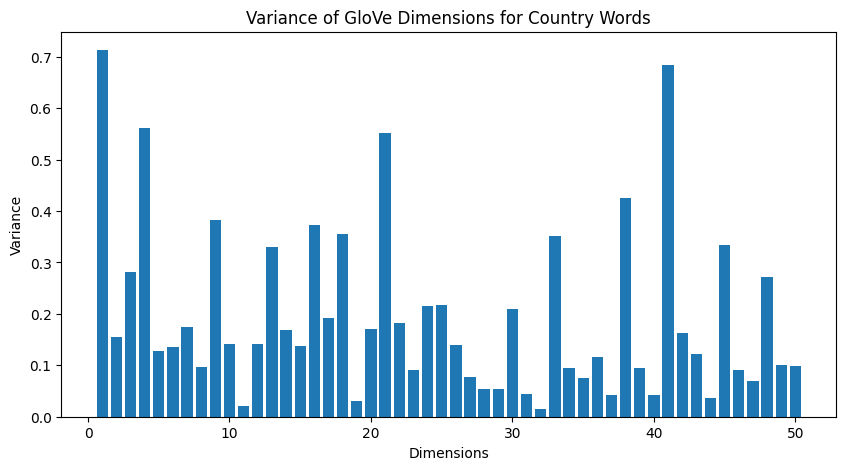

In [10]:
# Plotting the variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, 51), variances)
plt.title('Variance of GloVe Dimensions for Country Words')
plt.xlabel('Dimensions')
plt.ylabel('Variance')
plt.show()

In [11]:
# Identify dimensions with the highest variance
top_dims = np.argsort(-variances)[:3]  # Get indices of top 3 dimensions with highest variance

print("Top dimensions with the highest variance:", top_dims + 1)  # Adding 1 to match human-readable indexing (1-50)

Top dimensions with the highest variance: [ 1 41  4]


In [12]:
# Famili relations
aunt = model["aunt"]
uncle = model["uncle"]
man = model["man"] 
woman = model["woman"]

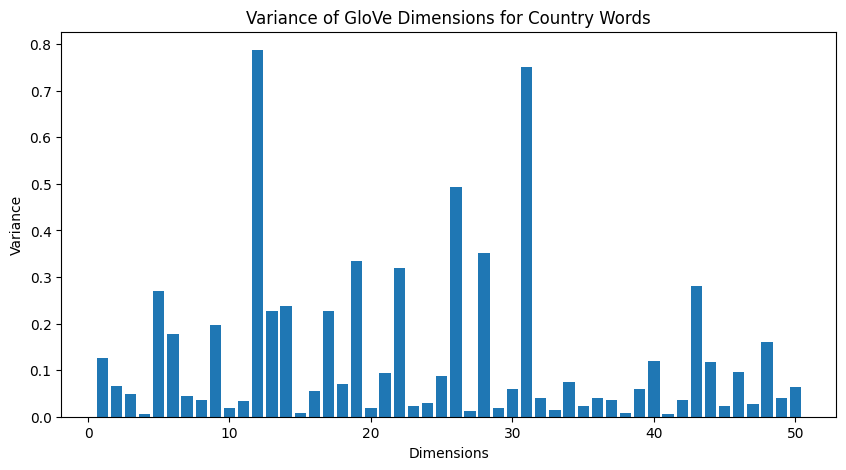

Top dimensions with the highest variance: [12 31 26]


In [29]:
vectors = ['aunt', 'uncle', 'man', 'woman']

# Extracting vectors
dict_vectors = {
    'aunt': model['aunt'],
    'uncle': model['uncle'],
    'mother': model['mother'],
    'father': model['father'],
    'man': model['man'],
    'woman': model['woman'],
}

vectors = np.array([model[fam] for fam in vectors])

# Calculate the variance along each dimension
variances = np.var(vectors, axis=0)

# Plotting the variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, 51), variances)
plt.title('Variance of GloVe Dimensions for Country Words')
plt.xlabel('Dimensions')
plt.ylabel('Variance')
plt.show()

# Identify dimensions with the highest variance
top_dims = np.argsort(-variances)[:3]  # Get indices of top 3 dimensions with highest variance

print("Top dimensions with the highest variance:", top_dims + 1)  # Adding 1 to match human-readable indexing (1-50)

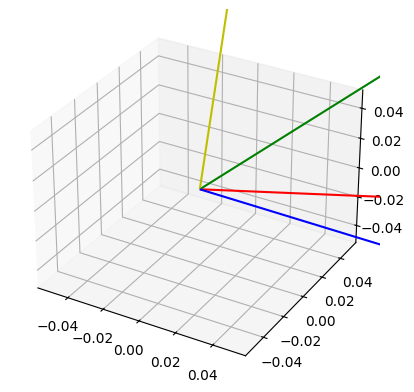

In [30]:
# create 3d plot with the 2 vecotrs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the vectors
ax.quiver(0,0,0, vectors[0][top_dims[0]], vectors[0][4], vectors[0][10], color='b', label=vectors[0])
ax.quiver(0,0,0, vectors[1][top_dims[0]], vectors[1][4], vectors[1][10], color='r', label=vectors[1])
ax.quiver(0,0,0, vectors[2][top_dims[0]], vectors[2][4], vectors[2][10], color='g', label=vectors[2])
ax.quiver(0,0,0, vectors[3][top_dims[0]], vectors[3][4], vectors[3][10], color='y', label=vectors[3])


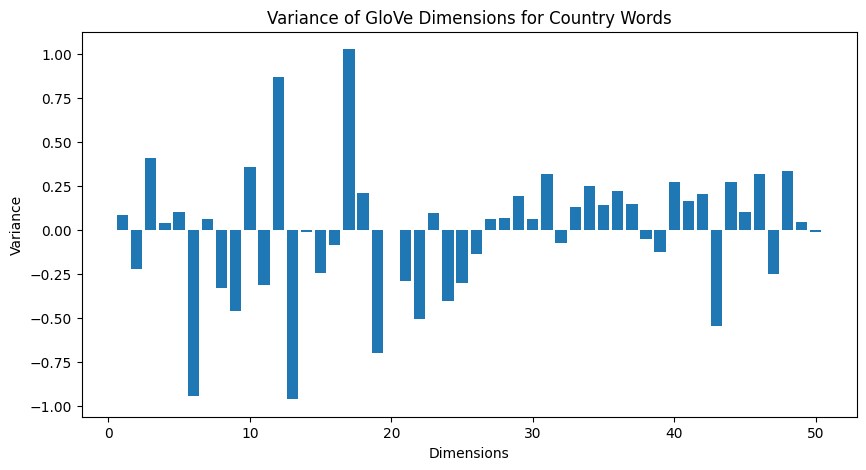

Top dimensions with the highest variance: [17 12  3]


In [33]:
gender = dict_vectors['man']-dict_vectors['woman']
# Plotting the variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, 51), gender)
plt.title('Variance of GloVe Dimensions for Country Words')
plt.xlabel('Dimensions')
plt.ylabel('Variance')
plt.show()

top_dims = np.argsort(-gender)[:3]  # Get indices of top 3 dimensions with highest variance
print("Top dimensions with the highest variance:", top_dims + 1)  # Adding 1 to match human-readable indexing (1-50)

Cosine Similarity between 'aunt - uncle' and 'woman - man': 0.6922299265861511
Cosine Similarity between 'mother - father' and 'woman - man': 0.6738762855529785


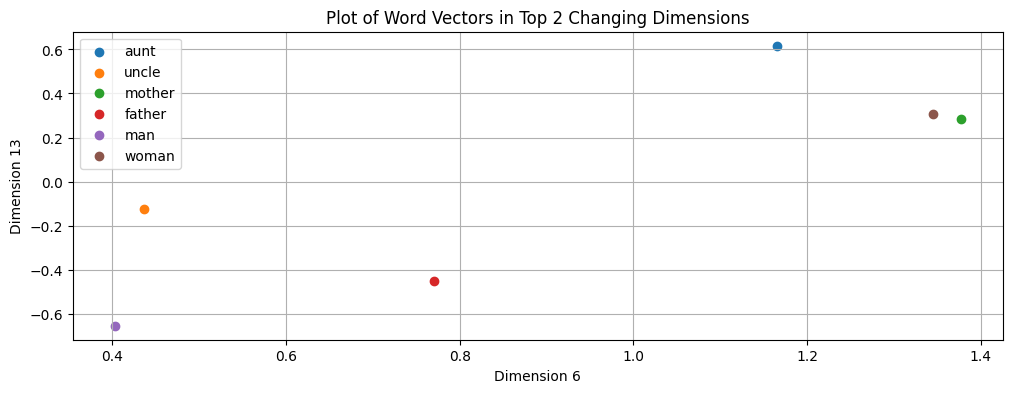

In [32]:
vectors = {
    'aunt': model['aunt'],
    'uncle': model['uncle'],
    'mother': model['mother'],
    'father': model['father'],
    'man': model['man'],
    'woman': model['woman'],
}

# Compute difference vectors
diff_aunt_uncle = vectors['aunt'] - vectors['uncle']
diff_mother_father = vectors['mother'] - vectors['father']
diff_woman_man = vectors['woman'] - vectors['man']

# Compute cosine similarities between differences
from scipy.spatial.distance import cosine

similarity_aunt_uncle = 1 - cosine(diff_aunt_uncle, diff_woman_man)
similarity_mother_father = 1 - cosine(diff_mother_father, diff_woman_man)

print(f"Cosine Similarity between 'aunt - uncle' and 'woman - man': {similarity_aunt_uncle}")
print(f"Cosine Similarity between 'mother - father' and 'woman - man': {similarity_mother_father}")

# Plot the vectors for the three highest changing dimensions
# Identify the top 3 dimensions with the greatest change
top_dims = np.argsort(np.abs(diff_woman_man))[-3:]

# Plotting these dimensions
plt.figure(figsize=(12, 4))

for i, word in enumerate(['aunt', 'uncle', 'mother', 'father', 'man', 'woman']):
    plt.scatter(vectors[word][top_dims[0]], vectors[word][top_dims[1]], label=word)

plt.xlabel(f'Dimension {top_dims[0] + 1}')
plt.ylabel(f'Dimension {top_dims[1] + 1}')
plt.title('Plot of Word Vectors in Top 2 Changing Dimensions')
plt.legend()
plt.grid(True)
plt.show()

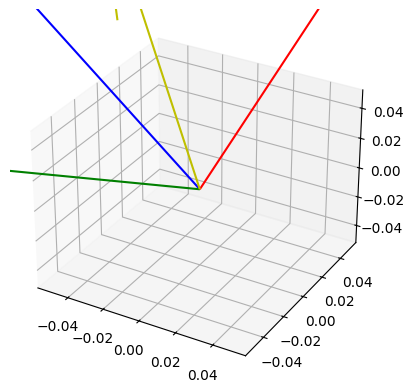

In [34]:
# plot on the top_dims[0] 3d plot 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the vectors
ax.quiver(0,0,0, vectors['aunt'][top_dims[0]], vectors['aunt'][top_dims[1]], vectors['aunt'][top_dims[2]], color='b', label='aunt')
ax.quiver(0,0,0, vectors['uncle'][top_dims[0]], vectors['uncle'][top_dims[1]], vectors['uncle'][top_dims[2]], color='r', label='uncle')
ax.quiver(0,0,0, vectors['mother'][top_dims[0]], vectors['mother'][top_dims[1]], vectors['mother'][top_dims[2]], color='g', label='mother')
ax.quiver(0,0,0, vectors['father'][top_dims[0]], vectors['father'][top_dims[1]], vectors['father'][top_dims[2]], color='y', label='father')

In [42]:
model["japan"]

array([-0.31739 , -0.14033 ,  0.32292 ,  1.072   ,  0.33008 ,  0.39406 ,
       -0.016682,  0.076903, -0.74591 , -0.31521 ,  1.0033  , -0.12659 ,
        0.063252,  0.64006 ,  0.70721 ,  0.84303 , -0.68832 ,  0.47214 ,
       -0.66002 ,  0.73962 ,  1.1116  , -0.89428 , -0.90364 , -0.47281 ,
        0.88529 , -2.0194  ,  0.30623 , -0.31662 , -0.44423 , -0.52139 ,
        3.0287  ,  0.70315 ,  0.92315 ,  0.52263 , -0.62674 , -0.58995 ,
       -0.15876 , -0.078332, -1.0794  , -0.71552 , -1.2764  , -0.85554 ,
        1.2827  , -1.2134  ,  1.0125  ,  0.40329 , -0.16276 ,  0.99117 ,
        0.031016, -0.35431 ], dtype=float32)

In [40]:
import plotly as py 
import plotly.graph_objects as go

# create 3d plot with the 2 vecotrs 

fig = go.Figure(data=[go.Scatter3d(
    x=[0, vectors['aunt'][top_dims[0]], vectors['uncle'][top_dims[0]], vectors['mother'][top_dims[0]], vectors['father'][top_dims[0]]],
    y=[0, vectors['aunt'][top_dims[1]], vectors['uncle'][top_dims[1]], vectors['mother'][top_dims[1]], vectors['father'][top_dims[1]]],
    z=[0, vectors['aunt'][top_dims[2]], vectors['uncle'][top_dims[2]], vectors['mother'][top_dims[2]], vectors['father'][top_dims[2]]],
    mode='markers+lines',
    marker=dict(size=12, color=['blue', 'red', 'green', 'yellow', 'orange']),
    line=dict(color='black', width=2)
)])


fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Text(-0.3091900050640106, -0.35172998905181885, 'japanese')

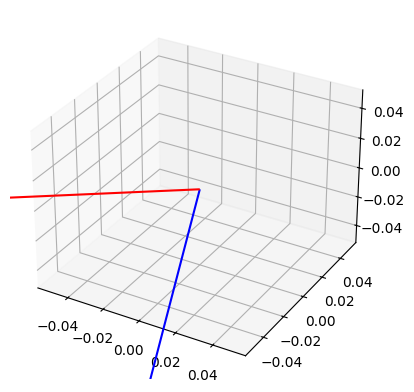

In [6]:
# create 3d plot with the 2 vecotrs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the sushi vector
ax.quiver(0, 0, 0, sushi_vector[0], sushi_vector[1], sushi_vector[2], color='b')
ax.text(sushi_vector[0], sushi_vector[1], sushi_vector[2], "sushi", color='b')

# plot the japanese vector
ax.quiver(0, 0, 0, japanese_vector[0], japanese_vector[1], japanese_vector[2], color='r')
ax.text(japanese_vector[0], japanese_vector[1], japanese_vector[2], "japanese", color='r')
